In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Generic Packages
import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt

#openCV
import cv2

#Tensor Flow
import tensorflow as tf

#Display Progress
from tqdm import tqdm

from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split

In [ ]:
categories = []
rootdir = '/content/drive/MyDrive/project3/data/traindata/kfood/나물'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
      categories.append(file)

categories_label = {category:i for i, category in enumerate(categories)} # 카테고리랑 숫자로 바꾼 값 dict형태로 만들기

In [ ]:
categories_label

{'가지볶음': 0,
 '고사리나물': 1,
 '미역줄기볶음': 2,
 '숙주나물': 3,
 '시금치나물': 4,
 '애호박볶음': 5}

In [ ]:
def load_data():

  rootdir = '/content/drive/MyDrive/project3/data/traindata/kfood/나물'
  images = []
  labels = []
# Iterate through each folder corresponding to a category
  for category in categories:
    path = os.path.join(rootdir,category)
    label = categories_label[category]

# Iterate through each image in our folder
    for img in tqdm(os.listdir(path)):
      try:
        # Get the path name of the image
        img_path = os.path.join(path, img)

        # Open and resize the img
        image = cv2.imread(img_path)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224, 224))

        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
      except Exception as someReadingError:
        pass

  return images , labels

In [ ]:
#Loading Data (Training & Test Dataset)
Images, Labels = load_data()

100%|██████████| 1002/1002 [00:25<00:00, 40.04it/s]


In [ ]:
X=np.array(Images)
Y=np.array(Labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs = 20,validation_split = 0.2)

Epoch 1/20
120/120 [==============================] - 11s 38ms/step - loss: 1.4458 - accuracy: 0.3851 - val_loss: 0.8904 - val_accuracy: 0.6079
Epoch 2/20
120/120 [==============================] - 2s 16ms/step - loss: 0.8388 - accuracy: 0.6733 - val_loss: 0.8916 - val_accuracy: 0.6820
Epoch 3/20
120/120 [==============================] - 2s 17ms/step - loss: 0.5889 - accuracy: 0.7966 - val_loss: 0.5056 - val_accuracy: 0.8311
Epoch 4/20
120/120 [==============================] - 2s 17ms/step - loss: 0.4766 - accuracy: 0.8370 - val_loss: 0.4041 - val_accuracy: 0.8603
Epoch 5/20
120/120 [==============================] - 2s 17ms/step - loss: 0.3741 - accuracy: 0.8764 - val_loss: 0.3291 - val_accuracy: 0.8926
Epoch 6/20
120/120 [==============================] - 2s 16ms/step - loss: 0.2807 - accuracy: 0.9046 - val_loss: 0.3465 - val_accuracy: 0.8884
Epoch 7/20
120/120 [==============================] - 2s 17ms/step - loss: 0.2309 - accuracy: 0.9205 - val_loss: 0.9470 - val_accuracy: 0.719

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

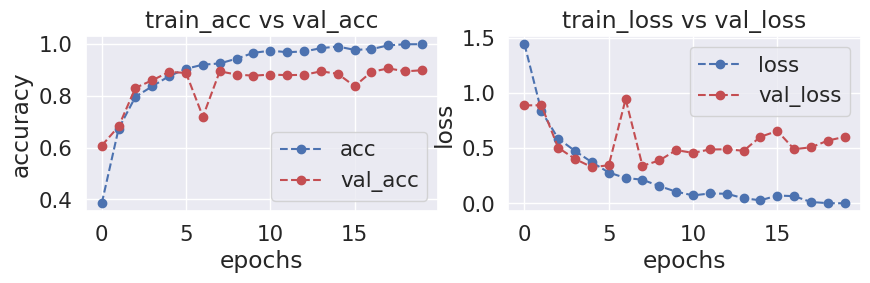

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [ ]:
predictions = model.predict(X_test)

# Convert the logits to probabilities
probabilities = tf.nn.softmax(predictions)

# Get the class with the highest probability
predicted_classes = np.argmax(probabilities, axis=1)

# Compare the predicted classes with the actual classes
comparison = list(zip(predicted_classes, y_test))

# Display the first 10 predictions and actual values
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {y_test[i]}')

38/38 [==============================] - 1s 14ms/step
Predicted: 3, Actual: 2
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 3, Actual: 3
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
